In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [0]:
file_name = "cardio_train.csv"
data1=uploaded[file_name].decode("utf-8").split("\n")

In [0]:
data=pd.read_csv('cardio_train.csv',sep=';')
#Converting age from days to years
data['age_years']=data['age']/365
data.drop(['id','age'], axis=1, inplace=True)

In [5]:
#data=pd.read_csv(r'F:\Ineuron\ML Challenge\CardioVascularDisease\cardio_train.csv',sep=';')
#data['age_years']=(data['age']/365).round().astype('int')
#data.drop(['id','age'], axis=1, inplace=True)
data

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,1,155,62.0,120,80,1,1,0,0,1,0,64.090411
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69297,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69298,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69299,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       69301 non-null  int64  
 1   height       69301 non-null  int64  
 2   weight       69301 non-null  float64
 3   ap_hi        69301 non-null  int64  
 4   ap_lo        69301 non-null  int64  
 5   cholesterol  69301 non-null  int64  
 6   gluc         69301 non-null  int64  
 7   smoke        69301 non-null  int64  
 8   alco         69301 non-null  int64  
 9   active       69301 non-null  int64  
 10  cardio       69301 non-null  int64  
 11  age_years    69301 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 6.3 MB


In [0]:
healthy = data[(data['cardio'] ==0) ].count()[1]
sick = data[(data['cardio'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 34679
num of pepole with chance for heart deacise: 34622


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


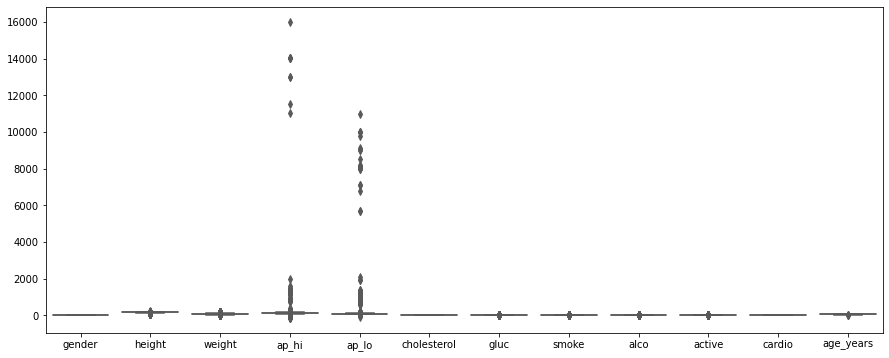

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.boxplot(data=data,palette="Set2")

In [0]:
data.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years'],
      dtype='object')

In [0]:
from scipy.stats import iqr

for col in ['height', 'weight', 'ap_hi', 'ap_lo']:
    InterQuartileRange=iqr(data[col])
    print('InterQuartileRange for',col,' =',InterQuartileRange)
    InterQuartileRangeLower=np.quantile(data[col], .25)
    print('InterQuartileRangeLower for',col,' =',InterQuartileRangeLower)
    InterQuartileRangeHigher=np.quantile(data[col], .75)
    print('InterQuartileRangeHigher for ',col,' =',InterQuartileRangeHigher)
    print('Max of ',col,' =',data[col].max())
    print('Min of ',col,' =',data[col].min())
    print('Lower Limit for ',col,' =',InterQuartileRangeLower-(1.5*InterQuartileRange))
    print('Upper Limit ',col,' =',InterQuartileRangeHigher+(1.5*InterQuartileRange))
    InRange=0
    OutRange=0
    for i in data[col]:
        if((InterQuartileRangeLower-(1.5*InterQuartileRange))<=i<=(InterQuartileRangeHigher+(1.5*InterQuartileRange))):
            InRange=InRange+1
        else:
            OutRange=OutRange+1
    print('InRange for ',col,' =',InRange)
    print('OutRange for ',col,' =',OutRange)

InterQuartileRange for height  = 11.0
InterQuartileRangeLower for height  = 159.0
InterQuartileRangeHigher for  height  = 170.0
Max of  height  = 250
Min of  height  = 55
Lower Limit for  height  = 142.5
Upper Limit  height  = 186.5
InRange for  height  = 68786
OutRange for  height  = 515
InterQuartileRange for weight  = 17.0
InterQuartileRangeLower for weight  = 65.0
InterQuartileRangeHigher for  weight  = 82.0
Max of  weight  = 200.0
Min of  weight  = 10.0
Lower Limit for  weight  = 39.5
Upper Limit  weight  = 107.5
InRange for  weight  = 67499
OutRange for  weight  = 1802
InterQuartileRange for ap_hi  = 20.0
InterQuartileRangeLower for ap_hi  = 120.0
InterQuartileRangeHigher for  ap_hi  = 140.0
Max of  ap_hi  = 16020
Min of  ap_hi  = -150
Lower Limit for  ap_hi  = 90.0
Upper Limit  ap_hi  = 170.0
InRange for  ap_hi  = 67882
OutRange for  ap_hi  = 1419
InterQuartileRange for ap_lo  = 10.0
InterQuartileRangeLower for ap_lo  = 80.0
InterQuartileRangeHigher for  ap_lo  = 90.0
Max of  ap

In [6]:
data_Clean=data.loc[
    (data['height']>142.5) & (data['height']<186.5) &
    (data['weight']>39.5) & (data['weight']<107.5) &
    (data['ap_hi']>90.0) & (data['ap_hi']<170.0) &
    (data['ap_lo']>65.0) & (data['ap_lo']<105.0) 
]
data_Clean.shape

(61163, 12)

In [0]:
data_Clean=data_Clean[['gender', 'age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio']]

In [0]:
X=data_Clean.loc[:, data_Clean.columns != 'cardio']
Y=data_Clean['cardio']

Variance Retained = [0.48864751 0.27725158]


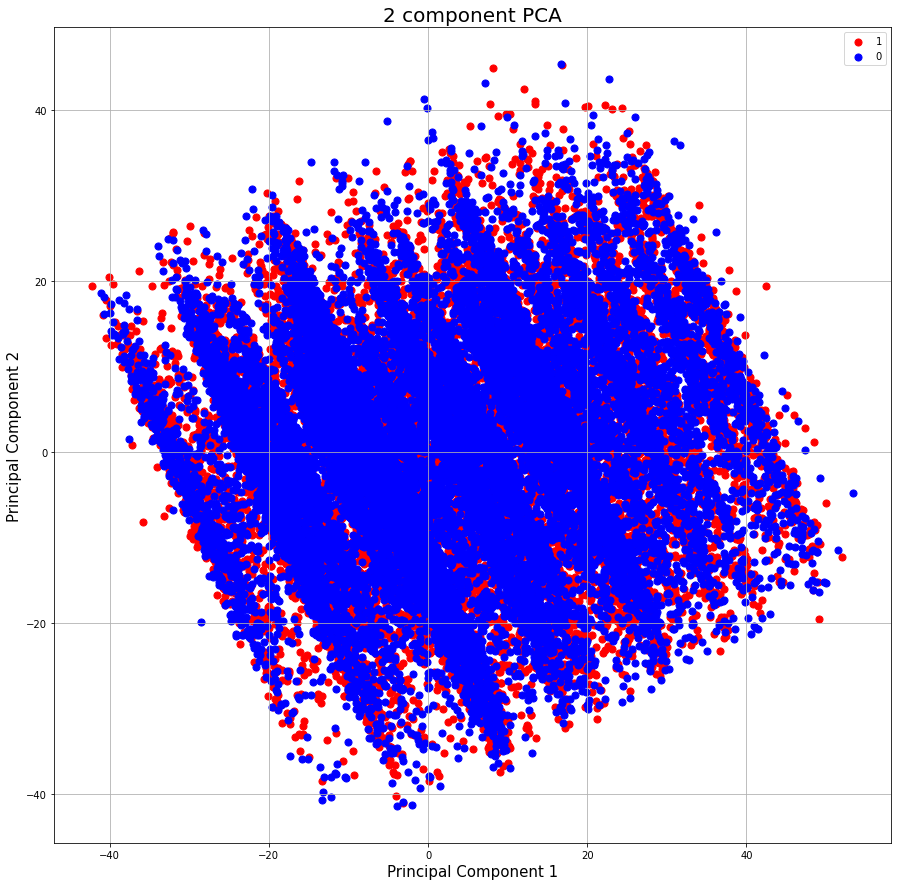

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print('Variance Retained =',pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cardio'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
X.columns

Index(['gender', 'age_years', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

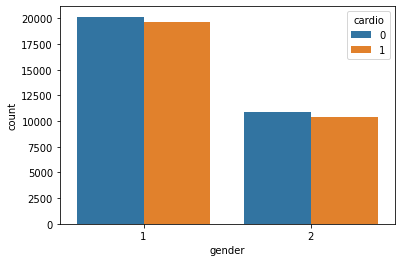

In [0]:
sns.countplot(x='gender', data=data_Clean, hue='cardio')
plt.show()

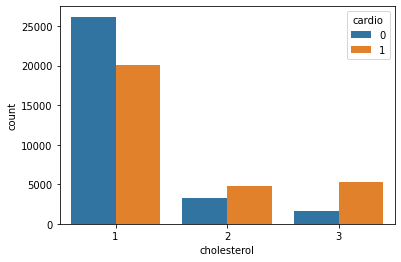

In [0]:
sns.countplot(x='cholesterol', hue='cardio', data=data_Clean)
plt.show()

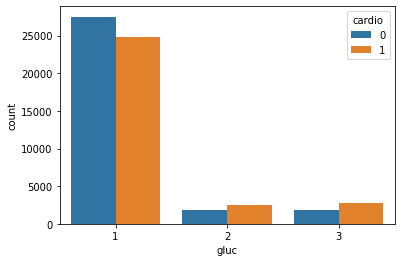

In [0]:
sns.countplot(x='gluc', hue='cardio', data=data_Clean)
plt.show()

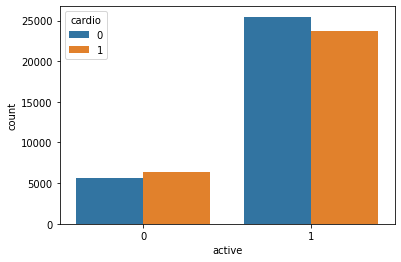

In [0]:
sns.countplot(x='active', hue='cardio', data=data_Clean)
plt.show()

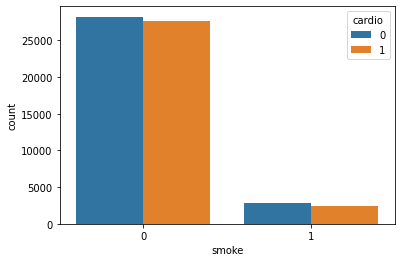

In [0]:
sns.countplot(x='smoke', hue='cardio', data=data_Clean)
plt.show()

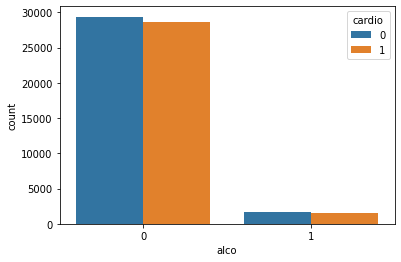

In [0]:
sns.countplot(x='alco', hue='cardio', data=data_Clean)
plt.show()

Text(0, 0.5, 'Host')

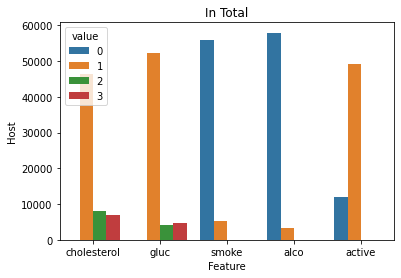

In [0]:
df_categorical = data_Clean.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));
plt.title('In Total')
plt.xlabel('Feature')
plt.ylabel('Host')

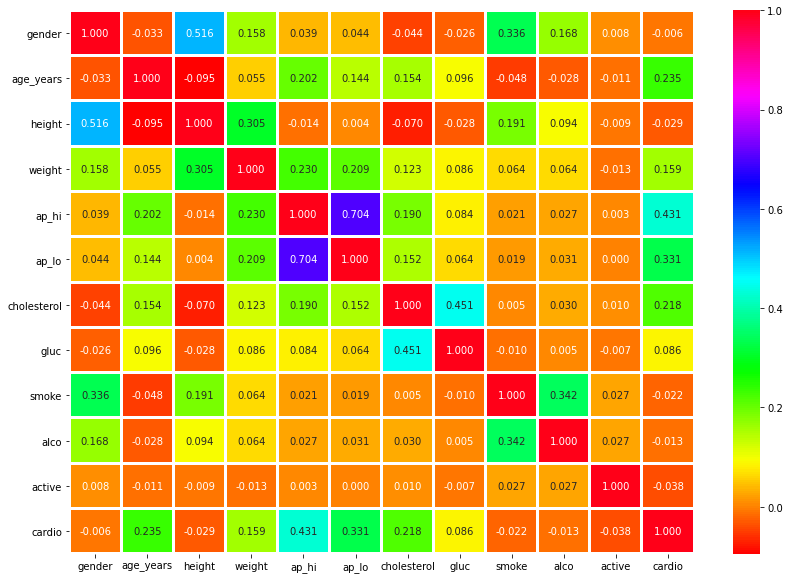

In [0]:
plt.figure(figsize=(14,10))
sns.heatmap(data_Clean.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [0]:
#level_map = {1: 'male', 2: 'female'}
#X['gender'] = X['gender'].map(level_map)
#level_map1 = {1: 'normal', 2: 'above_normal', 3: 'well_above_normal'}
#X['cholesterol'] = X['cholesterol'].map(level_map1)
#level_map1 = {1: 'normal', 2: 'above_normal', 3: 'well_above_normal'}
#X['gluc'] = X['gluc'].map(level_map1)

In [0]:
#Converting categories into columns
#X1 = pd.get_dummies(X[['cholesterol']], prefix = 'cholesterol')
#X = pd.concat([X, X1], axis=1)
#X2 = pd.get_dummies(X[['gluc']], prefix = 'glucose')
#X = pd.concat([X, X2], axis=1)
#X3 = pd.get_dummies(X[['gender']], prefix = 'gender')
#X = pd.concat([X, X3], axis=1)
#X.drop(columns=['cholesterol','gluc','gender'],inplace=True)
#X=X[['gender_male','gender_female','age_years','height','weight','ap_hi','ap_lo',
     #'cholesterol_normal','cholesterol_above_normal','cholesterol_well_above_normal',
     #'glucose_normal','glucose_above_normal','glucose_well_above_normal',
     #'smoke','alco','active']]
#print('Final columns =',X.columns)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
#normalized_X = preprocessing.normalize(X)
#normalized_X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [0]:
AdaBoostClassifier=AdaBoostClassifier()
param_grid_abc = {'n_estimators': [200,300,400,500],
             'learning_rate': [1,1.15,1.2,1.25,1.3]}

             

In [0]:
grid_search = GridSearchCV(estimator = AdaBoostClassifier,param_grid=param_grid_abc,cv=3)   
ABC_GS = grid_search.fit(X_train, Y_train)
print('Best Estimator for AdaBoostClassifier is',grid_search.best_estimator_)
Y_pred1 = ABC_GS.predict(X_test)
print('Confusion Matrix for AdaBoostClassifier is :',confusion_matrix(Y_pred1, Y_test))
print('Accuracy for AdaBoostClassifier is:- ',accuracy_score(Y_test, Y_pred1))

Best Estimator for AdaBoostClassifier is AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.2, n_estimators=300, random_state=None)
Confusion Matrix for AdaBoostClassifier is : [[8345 3579]
 [1931 6329]]
Accuracy for AdaBoostClassifier is:-  0.7270114942528736


In [0]:
GradientBoostingClassifier=GradientBoostingClassifier()
param_grid_gbc = {'n_estimators': [300,500,600,800,1000],
                  'learning_rate': [0.01,0.02,0.03,0.04],
                  'max_features':[2,3,4,5,6,7,8,9,10]
                 }

In [0]:
grid_search = GridSearchCV(estimator = GradientBoostingClassifier,param_grid=param_grid_gbc,cv=3)   
GBC_GS = grid_search.fit(X_train, Y_train)
print('Best Estimator for GradientBoostingClassifier is',grid_search.best_estimator_)
Y_pred1 = GBC_GS.predict(X_test)
print('Confusion Matrix for GradientBoostingClassifier is :',confusion_matrix(Y_pred1, Y_test))
print('Accuracy for GradientBoostingClassifier is:- ',accuracy_score(Y_test, Y_pred1))

Best Estimator for GradientBoostingClassifier is GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=3,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Confusion Matrix for GradientBoostingClassifier is : [[8095 3214]
 [2181 6694]]
Accuracy for GradientBoostingClassifier is:-  0.7327090764962346


In [0]:
#Implement SVM
svm = SVC()
parameters = {'kernel':('rbf','linear'), 
              'C':(1,0.5,0.75),
              'gamma': (1,'auto'),
              'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)}

In [0]:
grid_search = GridSearchCV(estimator=svm, param_grid = parameters,cv=3)
SVM_GS = grid_search.fit(X_train,Y_train)
print('Best Estimator for SVM is',grid_search.best_estimator_)
Y_pred4 = SVM_GS.predict(X_test)
print('Confusion Matrix for SVM is :',confusion_matrix(Y_pred4, Y_test))
print('Accuracy for SVM is:- ',accuracy_score(Y_test, Y_pred4))

Best Estimator for SVM is SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Confusion Matrix for SVM is : [[8272 3446]
 [2004 6462]]
Accuracy for SVM is:-  0.7299841458581054


In [0]:

knn = KNeighborsClassifier()
param_grid_KNN = {'n_neighbors': list(range(10,20)),
              'weights':["uniform", "distance"],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [0]:
grid_search = GridSearchCV(estimator=knn, param_grid = param_grid_KNN,cv=3)
KNN_GS = grid_search.fit(X_train,Y_train)
print('Best Estimator for KNeighborsClassifier is',grid_search.best_estimator_)
Y_pred5 = KNN_GS.predict(X_test)
print('Confusion Matrix for KNeighborsClassifier is :',confusion_matrix(Y_pred5, Y_test))
print('Accuracy for KNeighborsClassifier is:- ',accuracy_score(Y_test, Y_pred5))

Best Estimator for KNeighborsClassifier is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')
Confusion Matrix for KNeighborsClassifier is : [[8081 3485]
 [2195 6423]]
Accuracy for KNeighborsClassifier is:-  0.7185889813713833


In [0]:

ETC=ExtraTreesClassifier()
param_grid_ETC={'n_estimators': [100,200,500,700],
                'max_features':[2,3,4,5,6,7]
               }

In [0]:
grid_search = GridSearchCV(estimator=ETC, param_grid = param_grid_ETC,cv=3)
ETC_GS = grid_search.fit(X_train,Y_train)
print('Best Estimator for ExtraTreesClassifier is',grid_search.best_estimator_)
Y_pred6 = ETC_GS.predict(X_test)
print('Confusion Matrix for ExtraTreesClassifier is :',confusion_matrix(Y_pred6, Y_test))
print('Accuracy for ExtraTreesClassifier is:- ',accuracy_score(Y_test, Y_pred6))

Best Estimator for ExtraTreesClassifier is ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=2,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
Confusion Matrix for ExtraTreesClassifier is : [[7271 3062]
 [3005 6846]]
Accuracy for ExtraTreesClassifier is:-  0.6994153785176377


In [0]:
params = {"objective":["binary:logistic"],
          'colsample_bytree': [0.3,0.7],
          'learning_rate': [0.01,0.1,0.3],
          'max_depth': [3,4,5], 
          'alpha': [10], 
          'n_estimators':[2,5,7]}

In [0]:
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5)
xgb_GS=grid_search.fit(X_train, Y_train)
print('Best Estimator for AdaBoostClassifier is',xgb_GS.best_estimator_)
Y_pred2 = xgb_GS.predict(X_test)
print('Confusion Matrix for AdaBoostClassifier is :',confusion_matrix(Y_pred2, Y_test))
print('Accuracy for AdaBoostClassifier is:- ',accuracy_score(Y_test, Y_pred2))

Best Estimator for AdaBoostClassifier is XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=7, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Confusion Matrix for AdaBoostClassifier is : [[8208 3433]
 [2068 6475]]
Accuracy for AdaBoostClassifier is:-  0.7274573919936583


In [0]:
#Implementing RandomForestClassifier
RFC_param_grid = {'n_estimators': [3000,5000,7000],
                  'max_features': [1,2,3],
                  'min_samples_leaf': [6, 7, 10]}

In [0]:
RFC = RandomForestClassifier()
grid_search_RFC = GridSearchCV(estimator = RFC, param_grid = RFC_param_grid,cv=3,verbose=2)
RFC_GS = grid_search_RFC.fit(X_train, Y_train)
print('Best Estimator for RandomForestClassifier is',RFC_GS.best_estimator_)
Y_pred_RFC = RFC_GS.predict(X_test)
print('Confusion Matrix for RandomForestClassifier is :',confusion_matrix(Y_pred_RFC, Y_test))
print('Accuracy for RandomForestClassifier is:- ',accuracy_score(Y_test, Y_pred_RFC))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_features=1, min_samples_leaf=6, n_estimators=3000 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=1, min_samples_leaf=6, n_estimators=3000, total=  49.1s
[CV] max_features=1, min_samples_leaf=6, n_estimators=3000 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.1s remaining:    0.0s


[CV]  max_features=1, min_samples_leaf=6, n_estimators=3000, total=  48.9s
[CV] max_features=1, min_samples_leaf=6, n_estimators=3000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=3000, total=  49.1s
[CV] max_features=1, min_samples_leaf=6, n_estimators=5000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=5000, total= 1.4min
[CV] max_features=1, min_samples_leaf=6, n_estimators=5000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=5000, total= 1.4min
[CV] max_features=1, min_samples_leaf=6, n_estimators=5000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=5000, total= 1.4min
[CV] max_features=1, min_samples_leaf=6, n_estimators=7000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=7000, total= 1.9min
[CV] max_features=1, min_samples_leaf=6, n_estimators=7000 ...........
[CV]  max_features=1, min_samples_leaf=6, n_estimators=7000, total= 1.9min
[CV] max_features=1, min_samples_leaf=6, n_estima

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 143.2min finished


Best Estimator for RandomForestClassifier is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix for RandomForestClassifier is : [[8011 3139]
 [2265 6769]]
Accuracy for RandomForestClassifier is:-  0.7322631787554499


In [0]:


VC = VotingClassifier(estimators=[('clf1', GradientBoostingClassifier()),
                                  ('clf2', AdaBoostClassifier()),
                                  ('clf3', xgb.XGBClassifier()),
                                  #('clf4', SVC()),
                                  ('clf5',RandomForestClassifier())
                                  ],voting='soft')

params = {'clf1__learning_rate':[0.02],'clf1__max_features':[5],
          'clf2__learning_rate':[1.2], 'clf2__n_estimators':[300],
          'clf3__objective':['binary:logistic'],'clf3__colsample_bytree':[0.7],'clf3__learning_rate':[0.3],'clf3__max_depth':[5],'clf3__alpha':[10],'clf3__n_estimators':[7],
          #'clf4__kernel':['rbf'],'clf4__C':[0.5],'clf4__gamma':['auto'],'clf4__decision_function_shape':['ovo'],'clf4__shrinking':[True],
          'clf5__max_features':[2],'clf5__n_estimators':[5000],'clf5__min_samples_leaf':[6]}

In [39]:
grid_search = GridSearchCV(estimator=VC, param_grid=params, cv=3,verbose=2)
VC_GS=grid_search.fit(X_train, Y_train)
print('Best Estimator for VotingClassifier is',VC_GS.best_estimator_)
Y_pred_VC = VC_GS.predict(X_test)
print('Confusion Matrix for VotingClassifier is :',confusion_matrix(Y_test, Y_pred_VC))
print('Accuracy for VotingClassifier is:- ',accuracy_score(Y_test, Y_pred_VC))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000, total= 1.9min
[CV] clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000, total= 1.9min
[CV] clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000 
[CV]  clf1__learning_rate=0.02, clf1__max_features=5, clf2__learning_rate=1.2, clf2__n_estimators=300, clf3__alpha=10, clf3__colsample_bytree=0.7, clf3__learning_rate=0.3, clf3__max_depth=5, clf3__n_estimators=7, clf3__objective=binary:logistic, clf5__max_features=2, clf5__min_samples_leaf=6, clf5__n_estimators=5000, total= 1.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.7min finished


Best Estimator for VotingClassifier is VotingClassifier(estimators=[('clf1',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.02,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=5,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
       